<a href="https://colab.research.google.com/github/raeubaen/misc/blob/master/Bayesian_Cheating_Detection_(en)_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[//]: # (This may be the most BayesiaCheating Detection vorrei spiegare bene il metodo col codice che c'è ora e poi scrivere un pacchetto python da mettere su pip con la classe per il metodo generico, che si può pubblicare su JSS)

#Bayesian Cheating Detection

## Introduction

Detecting cheating in tests, exams and games can be hard when many tasks or several participants are involved.
This job can be simplified if there's an advantage for participants who hand in their work before others.
Under these circumstances, considering as cheating only illicit communications between participants, it can be asserted that,
given a specific task, the cheating teams or individuals will hand in their work at times considerably close to those who actually solved it first.
Then by analyzing the distribution of times we can quantitatively infer, using a new Bayesian technique called Bayesian Cheating Detection, if there has been a fraud.
This precise situation occurred in a 48-hour long treasure hunt held in 2019 in Sorrento (Italy) featuring seven teams and about thirty riddles to solve (given in different orders);
By analyzing data about the times when each team handed in the solution to each riddle, we were able to find two teams whose times were extremely similar for six consecutive riddles which were received in the same order. 
The resulting data can be used, with its related context, to explain the general method.
Despite its very specific origin, this technique can be applied in all mathematically equivalent situations such as exams, tests, other kinds of games and even in completely different 
fields, as instance when searching for time coincidence or other types of correlations between data from experiments, sensors, bank accounts and so on.

Scoprire frodi in esami, giochi e test può essere difficile quando vi sono molte prove da completare e molti partecipanti. Questo compito può essere semplificato, nel caso in cui vi sono più prove da completare ed il tempo di consegna conta, ossia vi è un vantaggio nel consegnare il proprio lavoro prima possibile, e vi sono più prove da completare. In questi casi, assumendo come frodi solo le comunicazioni improprie tra i partecipanti, possiamo dire che, fissata una prova, le squadre o le persone che imbrogliano consegneranno in momenti molto simili rispetto a chi ha risolto per primo. Quindi,  analizzando la distribuzione dei tempi di consegna, possiamo quantitativamente inferire, usando una nuova tecnica ecc., se c'è stata una frode. Proprio tale situazione si è verificata in una caccia al tesoro di 48 ore tenuta a Sorrento nel 2019 con 7 squadre e circa 30 indizi da risolvere (dati in ordine diverso alle varie squadre); analizzando i dati riguardanti i tempi nel quali ogni squadra ha consegnato la soluzione di ogni indizio, abbiamo trovato due squadre i cui tempi di consegna sono estremamente simili per 6 indizi consecutivi, che hanno ricevuto nello stesso ordine. Quindi useremo questi dati, ed il loro contesto per spiegare il metodo generale. 
Nonostante la loro origine davvero specifica, questa tecnica può essere applicata a tutte le situazioni matematicamente equivalenti, come esami, test e altri tipi di giochi, e anche in campi completamente diversi, come quando si cercano coindicenze temporali tra i dati provenienti da esperimenti, sensori, estratti conti, ecc.

##Proposed technique

###General definitions and considerations

Let us consider a timed (?) game where $S$ teams have $N$ riddles $i_1,\, \dots, i_N$ to solve in different orders. We also assume to know the so-called solution times, when each team solved each riddle and almost simultaneously received the next one by the committee. The numbering of riddles is determined by the order in which the winning team solved them. Let $I_i^{(s, t)}$ be the event: *teams $s$ and $t$ collaborated (or one helped the other) during the solution of the $i$-th riddle*. Conversely, the $NI_i^{(s, t)}$ event states a non-collaboration. If a $I_k^{(s, t)}$ event occurred, we expect the difference in absolute solution times of the $k$-th riddle between teams $s$ and $t$ to be smaller with respect to the $NI_k^{(s, t)}$ case. This reasoning allows us to estimate the ratio between $I_k^{(s, t)}$ and $NI_k^{(s, t)}$ probabilities, conditioned to the observation from our data of absolute times $t^s_i$ and $t^t_i$ for riddles $i$ from $i_1$ to $i_N$. This ratio is the Bayes Factor of the $I_k^{(s, t)}$ hypothesis with respect to the $NI_k^{(s, t)}$ one, inferred on the basis of the collected data. 

Consideriamo un gioco a tempo in cui $S$ squadre devono risolvere N indizi $i_1,\, \dots, i_N$, che vengono forniti in un ordine non specificato, diverso per ogni squadra. 
Supponiamo di conoscere i tempi in cui le squadre hanno risolto ogni indizio e, quasi contemporaneamente, ricevuto il seguente da parte del comitato. La numerazione degli indizi segue l'ordine in cui sono stati presentati alla squadra vincente. Nel nostro caso, ad esempio, l'indizio $i_{25}$, cioè il $25$-esimo dei `new team`, era "Tessuto", meglio noto come "Cencio".
Indichiamo come $I_i^{(s, t)}$ l'evento: le squadre $s$ e $t$ hanno collaborato durante la soluzione (o una ha comunicato la soluzione all'altra) dell'indizio $i$. Gli eventi $NI$, al contrario, indicano una non-collaborazione. Se un evento $I_i^{(s, t)}$ si è verificato, ci aspettiamo che, nei dati in nostro possesso, la differenza nei tempi assoluti di soluzione dell'indizio $i$ tra le due squadre $s$ e $t$ sia piccola rispetto al caso $NI_i^{(s, t)}$. E' proprio questo ragionamento che ci consente di stimare il rapporto tra la probabilità di $I_i^{(s, t)}$ e di $NI_i^{(s, t)}$, entrambe condizionate all'osservazione di tempi assoluti $t^s_i$ e $t^t_i$ per gli indizi da $i_1$ a $i_N$, sulla base dei dati in nostro possesso. Tale rapporto rappresenta il fattore di Bayes dell'ipotesi $I_i^{(s, t)}$ rispetto alla $NI_i^{(s, t)}$, inferito a partire dai nostri dati. 

### Likelihood definition

Let $P(D | I^{(s, t)}_{i_a} \dots I^{(s, t)}_{i_b})$ and $P(D | NI^{(s, t)}_{i_a} \dots NI^{(s, t)}_{i_b})$ be the probabilities to observe an event $D$ regarding the times contained in our data, conditioned to the collaboration, or non-collaboration, between teams $s$ and $t$ during riddles ranging from $i_a$ to $i_b$. 
We obviously suppose that both teams received riddles between $i_a$ and $i_b$ in the same order. In particular, being $\Delta T^{(s, t)}_{i_a} \dots \Delta T^{(s, t)}_{i_b} $ the differences in absolute solution times between teams $s$ and $t$ for the riddles from $i_a$ to $i_b$, we consider $D$ to be the event: 
$$  \forall i \in [i_a, i_b] \quad |\pmb{\Delta T}^{(s, t)}_i| < \max\limits_{j \in [i_a, i_b]} (|(\Delta t^{\mathrm{obs}})^{(s, t)}_j|) = M $$, being now $|\pmb{\Delta T}^{(s, t)}_i|$ a random variable. Then, fixing $M$ as the maximum observed difference in our range of riddles, $D$ is true if all the (now random variables) $|\pmb{\Delta T}^{(s, t)}_i|$ are less than $M$ for $i=i_a,...,i_b$; clearly, the distribution of these variables depends on the conditions in which the probability is evaluated ($I^{(s, t)}_{i_a} \dots I^{(s, t)}_{i_b}$ or $NI^{(s, t)}_{i_a} \dots NI^{(s, t)}_{i_b}$ in our case).
Our choice of the conditioned probability is motivated by the fact that, if all $|\pmb{\Delta T}^{(s, t)}_i|$ to be considered are identically distributed, the likelihood can be evaluated using only $M$, the number of riddles to be considered (that is $i_b - i_a$) and the cumulative distribution of the $|\pmb{\Delta T}^{(s, t)}_i|$ variables, reducing computation time needed. Furthermore, this likelihood  can tell the difference between a situation with gaussian data which are completely indipendent (like in the case of non-collaboration) without and strongly covariant (as a result of illicit communications). It should be underlined that a simple likelihood containing the product of pdfs cannot do the job, because, for example, with the standard normal, 10 consecutive data points all in 0 would be more probable than any other possible chance: the reason is that it forgets covariance. Another reasonable likelihood could use the classical approach with pdfs, using also the covariance matrix inferred from data.
The computational complexity is reduced in our technique, as, for given pair of team and range of riddle, we  evaluate the likelihood from only $M$, that is the ,as variable.

Siano $P(D | I^{(s, t)}_{i_a} \dots I^{(s, t)}_{i_b})$ e $P(D | NI^{(s, t)}_{i_a} \dots NI^{(s, t)}_{i_b})$ le probabilità condizionate di osservare un evento $D$ riguardante i tempi contenuti nei dati a nostra disposizione nelle due ipotesi di collaborazione e non collaborazione tra le squadre $s$ e $t$ durante la soluzione degli indizi compresi fra $i_a$ e $i_b$. Chiaramente supponiamo che, tra $i_a$ e $i_b$, le due squadre abbiano ricevuto gli indizi nello stesso ordine.
In particolare, dette $\Delta T^{(s, t)}_{i_a} \dots \Delta T^{(s, t)}_{i_b} $ le differenze nei tempi assoluti di soluzione tra le squadre $s$ e $t$ per gli indizi compresi fra $i_a$ e $i_b$, consideriamo $D$ come l'evento $ \forall i \in [i_a, i_b] \quad |\pmb{\Delta T}^{(s, t)}_i| < \max\limits_{j \in [i_a, i_b]} (|(\Delta t^{\mathrm{obs}})^{(s, t)}_j|) = M$, indicando con $|\pmb{\Delta T}^{(s, t)}_i|$ la relativa variabile casuale. Quindi, fissando $M$ come la massima differenza osservata nel nostro range di indizi, $D$ è vero se tutti gli $|\pmb{\Delta T}^{(s, t)}_i|$ (che ora sono variabili casuali) minori di $M$ per $i=i_a, ..., i_b$; chiaramente la distribuzione di queste variabili dipende dalle condizioni in cui la probabilità è calcolata.

La nostra scelta delle probabilità condizionate è motivata dal fatto che, se tutti i $|\pmb{\Delta T}^{(s, t)}_i|$ sono identicamene distribuiti, la likelihood si può calcolare usando solo $M$, il numero di indizi da considerare (ossia $i_b - i_a$) e la distribuzione cumulativa delle variabili $|\pmb{\Delta T}^{(s, t)}_i|$. Al contrario, usando l'approccio più ortodosso, avremmo dovuto definire la likelihood come il prodotto delle densità di probabilità delle differenze di tempo per ogni $i$, condizionate a una delle due ipotesi; essa quindi dipenderebbe da tutti i tempi osservati e il suo utilizzo avrebbe aumentato la complessità computazionale e il pessimismo (ossia l'ipersensibilità) della cheating detection.

### Modelling the time distributions

If the teams did not collaborate, we could assume that the time differences are normally distributed, with mean $\mu$ and st. dev. $\sigma$, inferred from all riddles; the normality of data in its whole is checked by a Kolmogorov-Smirnov test. Then:
$$P(D | NI^{(s, t)}_{i_a} \dots NI^{(s, t)}_{i_b}) = \prod\limits_{i = i_a}^{i_b} P(|\pmb{\Delta T}^{(s, t)}_i| < M) $$ with $\pmb{\Delta T}^{(s, t)}_i \sim \mathrm{Norm}(\mu, \sigma) \quad \forall i$.<br>
If the teams did collaborate, we could assume that the differences $\Delta t^{(s, t)}_i$ are uniformally distributed between two values $\mp a$, that is:
$$P(D | I^{(s, t)}_{i_a} \dots iI^{(s, t)}_{i_b}) = \prod\limits_{i = i_a}^{i_b} P(|\pmb{\Delta T}^{(s, t)}_i| < M) $$ with $\pmb{\Delta T}^{(s, t)}_i \sim \mathrm{Uniform}(-a, a) \quad \forall i$.

These choices obviously depend strongly on the considered situation; they are optimal for our treasure hunt, but must be generalized for other kinds of exams, games, and so on. We believe that the method is robust enough to deal with other reasonable choices  of distributions.


<br>
Nel caso di non collaborazione, possiamo assumere (grazie ad un test di normalità Kolmogorov-Smirnov eseguito sui dati - vedi codice) che le differenze siano distribuite in modo gaussiano, con media $\mu$ e dev. st. $\sigma$ inferite a partire da tutti gli indizi. 
Quindi:
$P(D | NI^{(s, t)}_{i_a} \dots NI^{(s, t)}_{i_b}) = \prod\limits_{i = i_a, \, \dots, i_b} P(|\pmb{\Delta T}^{(s, t)}_i| < M) $ con $\pmb{\Delta T}^{(s, t)}_i \sim \mathrm{Norm}(\mu, \sigma) \quad \forall i$

Nel caso di collaborazione, possiamo assumere che le differenze $\Delta t^{(s, t)}_i$ siano distribuite in modo uniforme tra due valori $\mp a$, ossia che:
$P(D | I^{(s, t)}_{i_a} \dots I^{(s, t)}_{i_b}) = \prod\limits_{i = i_a, ..., i_b}P(|\pmb{\Delta T}^{(s, t)}_i| < M) $ con $\pmb{\Delta T}^{(s, t)}_i \sim \mathrm{Uniform}(-a, a) \quad \forall i \in [i_a, i_b]$

Se necessario, l'uniforme può essere sostituita da qualsiasi altra distribuzione che rappresenti meglio il fenomeno.

### Bayesian step

We assume, before doing inferences, the ratio between a-priori probability of collaborating and not-collaborating to be $p$. In the case of total ignorance, it is usually taken $p=1$. Given that we believe that a collaboration is improbable (we are optimistic), we assume $p=0.01 = 1\%$. The final likelihood ratio is:
$$ \mathrm{LR} = \frac{P(D | I^{(s, t)}_{i_a} \dots I^{(s, t)}_{i_b})}{P(D | NI^{(s, t)}_{i_a} \dots NI^{(s, t)}_{i_b})}$$ and the resulting bayes factor:
$$bf = \frac{P(I^{(s, t)}_{i_a} \dots I^{(s, t)}_{i_b} | D)}{P(NI^{(s, t)}_{i_a} \dots NI^{(s, t)}_{i_b} | D)} = \frac{P(D | I^{(s, t)}_{i_a} \dots I^{(s, t)}_{i_b}) P(I^{(s, t)}_{i_a} \dots I^{(s, t)}_{i_b} )}{P(D | NI^{(s, t)}_{i_a} \dots NI^{(s, t)}_{i_b}) P(NI^{(s, t)}_{i_a} \dots NI^{(s, t)}_{i_b} )} = \mathrm{LR} \cdot p$$

With our data, considering the teams `skuato` and `corsari` from their 24th to 29th riddle, we obtain an $\mathrm{LR}$ of 14000 and then a Bayes factor of 140, that is above the commonly considered threshold of 100.

Assumiamo, prima di fare inferenza dai dati, che il rapporto tra le probabilità a priori di collaborazione e di non collaborazione sia un numero $p$. 
Nel caso di ignoranza totale rispetto alla validità di una ipotesi o dell'altra, si prende solitamente $p = 1$. 
Poichè noi NON abbiamo sospetti a priori, anzi supponiamo che sia improbabile una collaborazione tra le squadre, assumiamo $p = 0.01 = 1 \%$.
Il likelihood ratio finale $\mathrm{LR} = \frac{P(D | I^{(s, t)}_{i_a} \dots I^{(s, t)}_{i_b})}{P(D | NI^{(s, t)}_{i_a} \dots NI^{(s, t)}_{i_b})}$  che si ottiene, riguardo alla collaborazione tra `skuato` e `corsari` dal loro 24-esimo indizio fino al 29-esimo, è maggiore di 14000 (come si otterrà dai calcoli). Perfino con questa ipotesi iniziale di presunta onestà, quindi, si ottiene un fattore di bayes $$bf = \frac{P(I^{(s, t)}_{i_a} \dots I^{(s, t)}_{i_b} | D)}{P(NI^{(s, t)}_{i_a} \dots NI^{(s, t)}_{i_b} | D)} = \frac{P(D | I^{(s, t)}_{i_a} \dots I^{(s, t)}_{i_b}) P(I^{(s, t)}_{i_a} \dots I^{(s, t)}_{i_b} )}{P(D | NI^{(s, t)}_{i_a} \dots NI^{(s, t)}_{i_b}) P(NI^{(s, t)}_{i_a} \dots NI^{(s, t)}_{i_b} )} = \mathrm{LR} \cdot p = 140$$che è maggiore della soglia di 100 che si considera comunemente. *(Jeffreys, Harold (1998) [1961]. The Theory of Probability (3rd ed.). Oxford, England. p. 432. ISBN 9780191589676.)*

Iniziamo l'analisi eseguendo uno scatter plot dei tempi assoluti nei quali le squadre hanno risolto ciascun indizio.

In [ ]:
# downloading data
!wget -q -N https://github.com/raeubaen/ml/raw/master/excel.zip 
!yes | unzip excel.zip > \dev\null 2>&1

In [ ]:
# Importing external modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import itertools
from scipy import stats

# Graphics settings
plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = '#f7f9fc'

# Suppress warnings
# should run only when the program has already been tested
import warnings
#warnings.filterwarnings("ignore")

In [ ]:
###---------------------------------
# Parsing excel files
path = os.getcwd()
files = os.listdir(path)

excel_files = [
  f for f in files 
  if f[-4:] == 'xlsx' and f[:3]!="hsl"
]
team_num = len(excel_files)

# Dictionary with teams as keys 
# and their Dataframes (containing minutes read from excel) as values
dfs = {
  f[:-5]: pd.read_excel(f, usecols=[
    "nome indizio", "minuti da inizio", "minuti impiegati",
  ])
  for f in excel_files
}

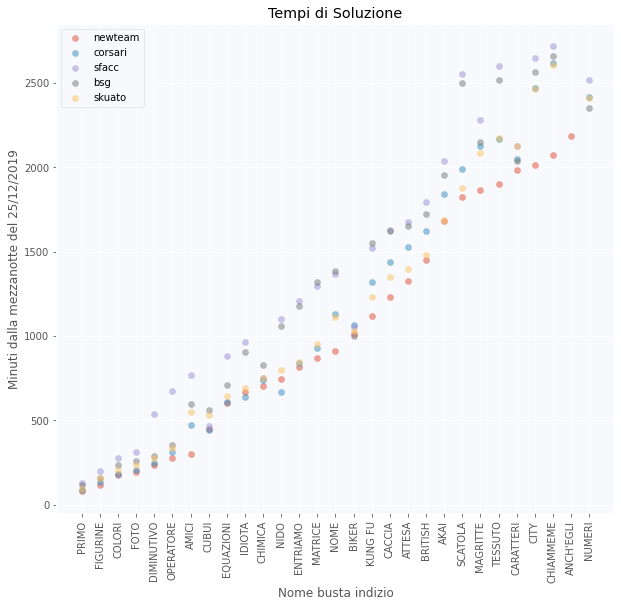

In [ ]:
###--------------------------------------------
# Plotting minfromstart on (y) and riddle names on (x) for each team
missing = ["MIAO", "FINALCOUNTDOWN", "PASSEGGIATA"] # riddles not solved by all teams analyzed

fig, ax = plt.subplots(figsize=(10, 10))
for f, df in dfs.items():
  # renaming columns in
  #   -riddle: riddle titles,
  #   -mins:    minutes from start,
  #      referred to the moments when the teams received the riddles (m1, ...)
  #   -dmin:   minutes taken to solve riddles (m2-m1, ...)
  df.rename(columns={
    'nome indizio':     'riddle',
    'minuti da inizio': 'mins',
    'minuti impiegati': 'dmin',
  }, inplace=True)
  # dropping rows with nan values 
  df.dropna(inplace=True)
  # excluding riddles in the missing list
  for m in missing:
    df = df[df.riddle != m] 
  # sorting by mins
  df.sort_values(by=['mins'], inplace=True)
  # copying the index into a column to number riddles 
  df['num'] = df.index
  # re-assigning to the dictionary
  dfs[f] = df
  ## scatter plot
  # slicing to get times when teams solved
  ax.scatter(
    df.riddle.to_numpy()[:-1], df.mins.to_numpy()[1:],
    label=f, alpha=0.5
  )

plt.xticks(rotation=90)
plt.legend()
ax.set(xlabel="Nome busta indizio", ylabel="Minuti dalla mezzanotte del 25/12/2019",)
fig.subplots_adjust(bottom=0.2)
plt.title("Tempi di Soluzione")
plt.savefig("times.pdf")
plt.show() #blocking
plt.close()

Costruiamo ora il modello gaussiano per le differenze tra i tempi di risoluzione per ciascuna coppia di squadre, semplicemente calcolandone la media e la dev. st. La validità del modello verrà provata tramite il test di Kolmogorov-Smirnov (vedi codice). Plotteremo inoltre gli istogrammi delle differenze di tempo, indicando i $p-value$ del suddetto test, sovrapponendovi le relative pdf gaussiane. 

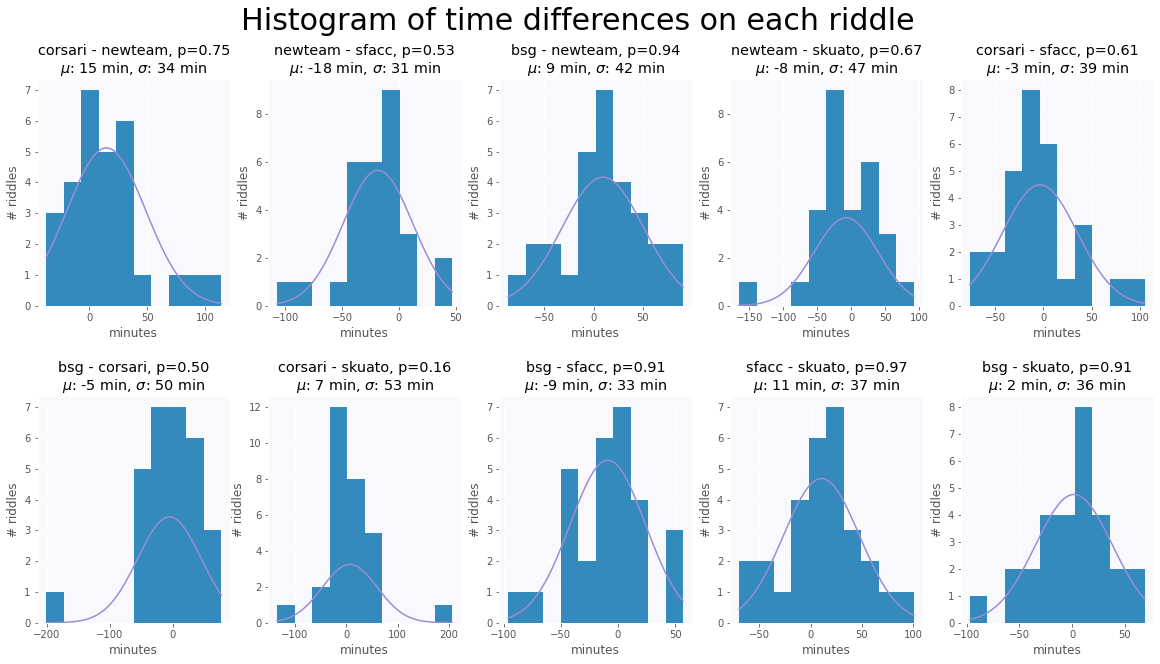

In [ ]:
###-------------------------------------...................................
# Constructing a gaussian model for the differences between all pairs of teams 
# in the time taken to solve each riddle 

# ordering by riddle name 
for f, df in dfs.items():
  df.sort_values(by=['riddle'], inplace=True) 
  dfs[f] = df.reset_index(drop=True)

##-------------------------------------------
# Calculating, saving in $diff and plotting averages and st. devs 

def shape_and_size(pairs = 5):
    a = int(np.sqrt(pairs))
    while pairs%a > 0: a -= 1
    return (a, pairs//a), (4*pairs//a, 5*a)

axs_shape, figsize = shape_and_size(pairs=team_num*(team_num-1)//2)
fig, axs = plt.subplots(*axs_shape, figsize=figsize)

# DataFrame to store mu and sigma values for time differences
gauss = pd.DataFrame(columns=["label", "team0", "team1", "mu", "sigma"])

i = 0
# iterating over all couples of teams
for pair in itertools.combinations(dfs.keys(), 2): 
  pair = sorted(pair) # to define an order

  label = pair[0] + " - " + pair[1]
  time_diff = dfs[pair[0]].dmin - dfs[pair[1]].dmin

  mu = np.mean(time_diff)
  sigma = np.std(time_diff)

  #---------------------------------------------------------
  # Plotting histograms of time difference between teams
  # Testing for normality via Kolmogorov-Smirnov (KS) test
  # KS-test p-value - displayed in the histograms
  pvalue = stats.kstest((time_diff - mu)/sigma, 'norm').pvalue 

  minimum = np.min(time_diff)
  maximum = np.max(time_diff)
  x = np.linspace(minimum, maximum, 100)
  binwidth = 15
  bins=np.arange(minimum, maximum + binwidth, binwidth)

  axs[i//5, i%5].hist(time_diff)
  axs[i//5, i%5].hist(time_diff)
  # overlapping the gaussian pdf curve to the histogram
  axs[i//5, i%5].plot(x, len(time_diff)*binwidth*stats.norm.pdf(x, mu, sigma))

  axs[i//5, i%5].set(
    title=f"{label}, p={pvalue:.2f}\n$\mu$: {mu:.0f} min, $\sigma$: {sigma:.0f} min", 
    xlabel="minutes", ylabel="# riddles",
  )

  i += 1

  # saving mu and sigma in the Dataframe
  gauss = gauss.append({
    "label": label, "team0": pair[0], "team1": pair[1],
     "mu": mu, "sigma": sigma,
  }, ignore_index=True)

fig.suptitle(
  'Histogram of time differences on each riddle', 
  fontsize=30
)
fig.subplots_adjust(hspace=0.4)
plt.savefig("hist.pdf")
plt.show()
plt.close()

Mostriamo ora le medie e le deviazioni standard ottenute, rappresentandole sotto forma di punti con incertezza a 1 $\sigma$.


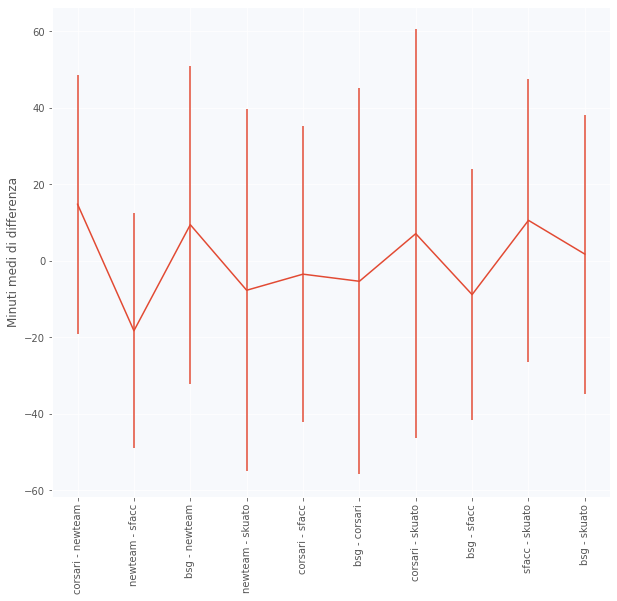

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.errorbar(gauss.label, gauss.mu, yerr=gauss.sigma)
plt.xticks(rotation=90)
ax.set(ylabel="Minuti medi di differenza")
fig.subplots_adjust(bottom=0.2)
plt.savefig("diff.pdf")
plt.show() #blocking
plt.close()

Calcoliamo finalmente i fattori di Bayes per tutte le coppie di squadre e per tutti i valori possibili di $i_1$ e $i_2$. 
In questa fase preliminare, per evidenziare i casi sospetti, tagliamo i risultati ottenuti a 1000 per fissare una scala massima unica per tutti i grafici che saranno realizzati, rendendoli più comodi da leggere. 

Poiché l'ordine degli indizi non è noto a priori, bisogna agire per fasi.

In primo luogo, per ogni coppia di squadre, si determinano gli indizi consegnati a meno di $b$ minuti di distanza (un buon valore è $b = 2a$); tra di essi vengono poi isolate delle sequenze di indizi che le squadre hanno ricevuto consecutivamente.
Solo su queste sequenze (le uniche in cui si può ammettere una collaborazione) avviene il calcolo del fattore di Bayes.

Verrà infine plottato un grafico riassuntivo con una heatmap per ogni coppia di squadre, colorata in base ai fattori di bayes collaborazione/non-collaborazione per ciascun intervallo di indizi $i_1$ e $i_2$ (i cui valori numerici sono tagliati a 10000, vedi sopra).
Gli indizi non considerati nell'analisi bayesiana sono mostrati in colore neutro nel grafico.

Come parametro della distribuzione uniforme (vedi sopra) prendiamo $a = 10 \, \mathrm{min}$ ( ` unif_range `  nel codice), considerando che sia orientativamente l'intervallo di tempo che passa tra il momento in cui una squadra (o due squadre...) risolvono e il momento in cui il comitato riceve la soluzione (che è il dato in nostro possesso).

---
La funzione che calcola i fattori di bayes è completamente vettorizzata; essa prende in input i dataframe con i dati delle due squadre, relativi ad una specifica sequenza $S$ di indizi, e restituisce i fattori di bayes relativi a tutti gli intervalli di indizi contenuti in $S$. Detto $T$ il numero totale degli indizi, l'output della funzione è una matrice $T \times T$ riempita con valori $nan$, tranne che per gli indizi ricevuti in input, numerati riferendosi alla prima squadra (in ordine alfabetico) della coppia.
<br>
Le sequenze $S$ consistono negli indizi dati alle squadre nello stesso ordine, nei quali la differenza massima nei tempi di risoluzione è inferiore a una certa soglia (nel nostro caso 30 minuti).


In [ ]:
unif_range = 10
riddle_tot = 30 # number of riddles
###------------------------------------------------------------------
## Evaluate bayes factors on a single chunck of consecutive riddles
def bayes_factor_one_chunck(
  df0, df1, gauss=gauss,
  pair=None, unif_range=unif_range, riddle_tot=30
):
  # df0 and df1 only contain suspected riddles

  pair = sorted(pair)
  label = pair[0] + " - " + pair[1]

  time_diff = df0.mins.to_numpy() - df1.mins.to_numpy()

  n_riddles = len(time_diff)
  riddles = np.arange(n_riddles)
  r1, r2 = np.meshgrid(riddles, riddles)
  # we must impose always r2 > r1
  ind = np.triu_indices(n_riddles) # upper triangolar matrix indices
  r1, r2 = r1[ind], r2[ind]

  # max_diff will contain the maxima within all possible intervals,
  #   as an upper triangular matrix - created empty, to be filled later
  lhood_no_fraud = np.empty((n_riddles, n_riddles)) * np.nan
  lhood_fraud = np.empty((n_riddles, n_riddles)) * np.nan

  # reductions contains (as couples in a list) 
  # all possible pairs of interval limits (r2 > r1)
  # i.e. 0, 1, 0, 2, 0, 3, ..., 1, 2, ..., 2, 3, ....
  reductions = np.column_stack((r2, r1+1)).ravel()

  # extracting mu and sigma from the Dataframe
  df = gauss[gauss.label==label]
  m, s = df.mu.iloc[0], df.sigma.iloc[0]

  # cumulative density functions
  # np.ufunc.reduceat applys one ufunc (e.g. add, max, min, multiply, ...)
  # to the slices of an array; the slicings are defined by couples of indices 
  # in a list formatted as $reductions

  lhood_no_fraud[ind] = np.multiply.reduceat(
    np.append(stats.norm.pdf(time_diff, m, s), 0), reductions
  )[: : 2]
  print(stats.norm.pdf(time_diff, m, s))
  print(stats.norm.pdf(time_diff, 0, 5))
  lhood_fraud[ind] = np.multiply.reduceat(
    np.append(stats.norm.pdf(time_diff, 0, 5), 0), reductions
  )[: : 2]

  bf = (lhood_fraud+1e-40)/(lhood_no_fraud+1e-40) # summing 1e-40 to avoid 0/0

  ret = np.empty((riddle_tot, riddle_tot)) * np.nan
  # extract first and last riddle numbers
  fr, lr = df0.num.min(), df0.num.max()+1 # numbering following the 1st team 

  ret[fr:lr, fr:lr] = bf

  return ret

In [ ]:
def add_ignore_nans(a, b):
  stacked = np.array([a, b])
  res = np.nansum(stacked, axis=0)
  res[np.all(np.isnan(stacked), axis=0)] = np.nan
  return res

In [ ]:
def consecutive_chunks(df0, df1):
  df0 = df0.sort_values(["num"])
  df0 = df0.set_index('num')
  df0 = df0.reset_index()

  df1 = df1.set_index('riddle')
  df1 = df1.reindex(index=df0['riddle'])
  df1 = df1.reset_index()

  df_tot = pd.concat([df0, df1])
  df_tot.sort_index(inplace=True)
  df_tot.reset_index(inplace=True)

  s = np.arange(0, len(df0), 0.5).astype("int") # 0, 0, 1, 1, 2, 2, ...

  # returns list of series of consecutives riddles 
  consec_chunks = [
    df.drop_duplicates() for df in [ 
      d[d.duplicated('riddle') | d.duplicated('riddle', keep='last')].riddle 
        for _, d in df_tot.groupby(df_tot.sort_index().num - s)
    ]
    if len(df) > 2
  ]
  return consec_chunks

In [ ]:
threshold = 20 # maximum time difference allowed in case of fraud

def bayes_factor_all(dfs, pair, unif_range=unif_range):
  df0, df1 = dfs[pair[0]], dfs[pair[1]]
  riddle_tot = len(df0) + 1

  ind = (df0.mins - df1.mins).abs() < threshold
  df0 = df0[ind]
  df1 = df1[ind]
  
  consec_chunks = consecutive_chunks(df0, df1)

  bf_mat = np.empty((riddle_tot, riddle_tot))*np.nan
  for chk in consec_chunks:
    temp1 = df0.merge(chk, on=['riddle'], how='inner')
    temp2 = df1.merge(chk, on=['riddle'], how='inner')
    bf_mat = add_ignore_nans(
      bf_mat, bayes_factor_one_chunck(
        temp1, temp2,
        pair = pair,
        riddle_tot = riddle_tot,
      )
    )
  return bf_mat

[0.00694966 0.00861224 0.0100941  0.01041175 0.00799871 0.01070207]
[2.67660452e-05 4.47890607e-03 5.79383105e-02 7.36540281e-02
 8.86369683e-04 7.97884561e-02]
[0.00842202 0.00833165]
[0.00709492 0.07978846]
[0.00720919 0.00739898]
[0.02994549 0.07978846]
[0.00745993 0.00745885 0.00745885 0.00720919 0.00733243]
[0.01579003 0.04839414 0.04839414 0.02994549 0.06664492]
[0.01029701 0.01170128]
[0.01079819 0.07978846]
[0.00990794 0.01024305]
[0.00012238 0.00088637]


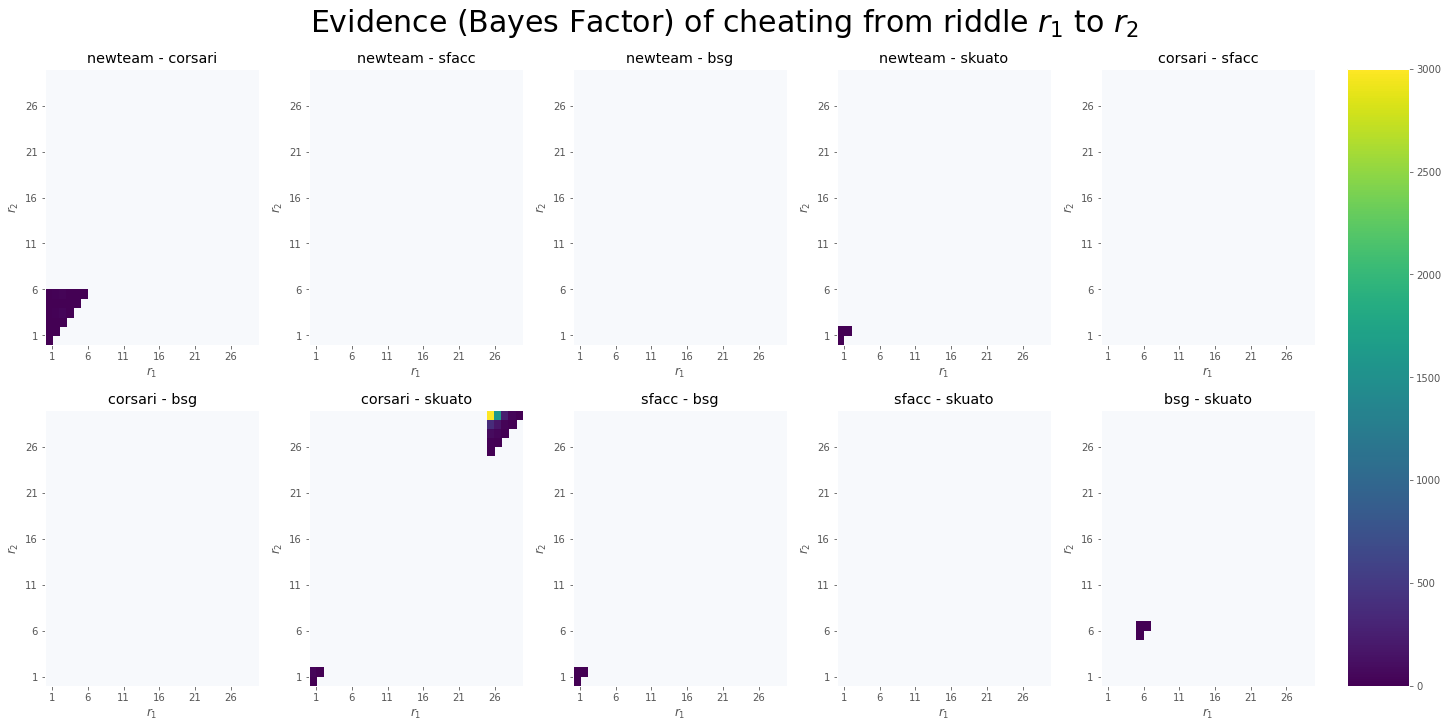

CPU times: user 3.54 s, sys: 487 ms, total: 4.03 s
Wall time: 3.55 s


In [ ]:
%%time
start, end = 1, 29
ticks = np.arange(start, end+1, 5)
fig, axs = plt.subplots(*axs_shape, figsize=figsize, constrained_layout=True)
i = 0
# iterating over all couples of teams
for pair in itertools.combinations(dfs.keys(), 2):
  ax = axs[i//5, i%5]
  bf_mat = bayes_factor_all(dfs, pair)
  im = ax.pcolormesh(bf_mat.T, vmin=0, vmax=3000) #normalizing on the threshold
  ax.set(
    xticks=ticks, yticks=ticks, 
    xlabel="$r_1$", ylabel="$r_2$", 
    title = pair[0] + " - " + pair[1]
  )
  i += 1

fig.suptitle("Evidence (Bayes Factor) of cheating from riddle $r_1$ to $r_2$", fontsize=30)
plt.savefig(f"bayes.pdf")
fig.colorbar(im, ax=axs.ravel().tolist())
plt.show()
plt.close()

Come si vede dal grafico, l'unico segnale abbastanza forte da poter essere considerato significativo si riferisce a corsari e skuato, tra il 24-esimo ed il 29-esimo indizio. Riplottiamo dunque solo il grafico relativo a queste due squadre, evitando di clippare i valori a 1000.

[0.00720919 0.00739898]
[0.02994549 0.07978846]
[0.00745993 0.00745885 0.00745885 0.00720919 0.00733243]
[0.01579003 0.04839414 0.04839414 0.02994549 0.06664492]


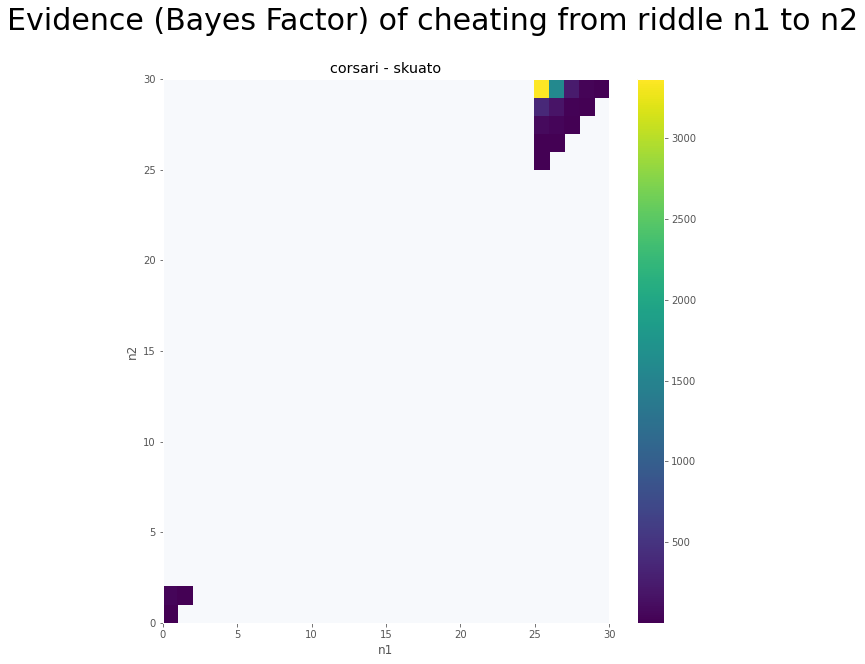

In [ ]:
pair = ["corsari", "skuato"]
fig, ax = plt.subplots(figsize=(10, 10))

bf_mat = bayes_factor_all(dfs, pair)
im = ax.pcolormesh(bf_mat.T)

ax.set(xlabel="n1", ylabel="n2", title = pair[0] + " - " + pair[1])
fig.suptitle("Evidence (Bayes Factor) of cheating from riddle n1 to n2", fontsize=30)
fig.colorbar(im)
plt.savefig(f"bayes-corsari-skuato.pdf")
plt.show()
plt.close()

# Conclusioni

L'evidenza a favore di una collaborazione tra `corsari` e `skuato` tra il $24$-esimo ed il $29$-esimo indizio risulta statisticamente significativa, essendo il fattore di Bayes relativo 14000.